# Festive Sales Performance Analysis

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns

In [2]:
df=pd.read_csv(r'Festive.csv',encoding='unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop unrelated/blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# drop null values
df.dropna(inplace=True)

In [10]:
# use to check rows and cols
df.shape

(11239, 13)

In [11]:
#change datatype of Amount
df['Amount'] = df['Amount'].astype('int')
# check datatype
df['Amount'].dtypes


dtype('int64')

In [12]:
#  checks columns name
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# EXPOLATORY DATA ANALYSIS

## Gender

In [14]:
num_gender = df['Gender'].value_counts().reset_index() 

print(num_gender)

  Gender  count
0      F   7832
1      M   3407


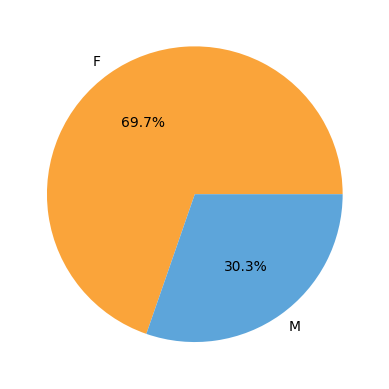

In [15]:
# plotting a pie chart for Gender 
plt.pie(num_gender['count'], labels=num_gender['Gender'],autopct='%1.1f%%', colors=['#FAA43A','#5DA5DA'])
plt.show()


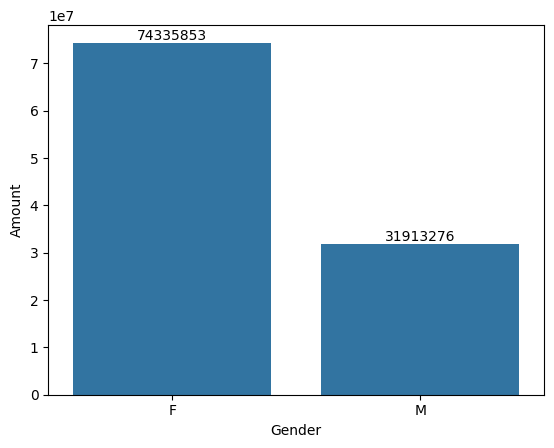

In [16]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax=sns.barplot(x='Gender',y='Amount',data=sales_gen)
for container in ax.containers:
    ax.bar_label(container, fmt='%0.f')


##### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

## Age

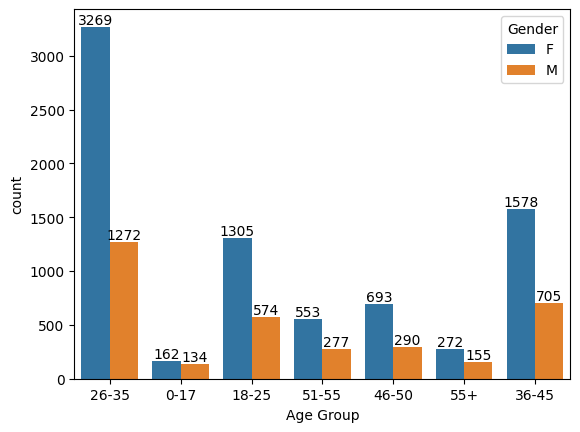

In [17]:
# plotting a bar chart for age group and it's count
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

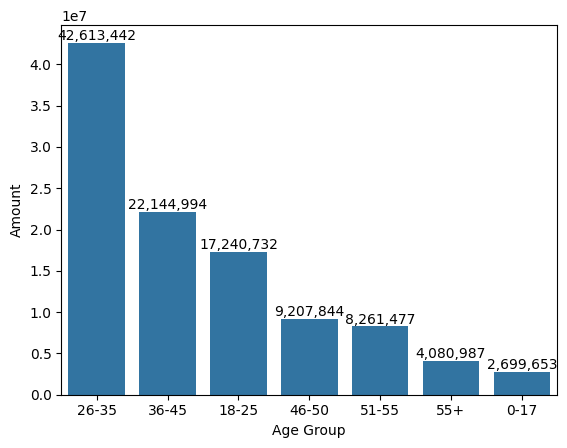

In [20]:
# Total Amount vs Age Group
sales_gen=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax=sns.barplot(x='Age Group',y='Amount',data=sales_gen)
for bar in ax.containers:
    ax.bar_label(bar, fmt='{:,.0f}')



##### insights : 
The 26–35 age group is the most active and highest spending segment, followed by 36–45 and 18–25. Females consistently outnumber males across all age groups, indicating a stronger female customer base. Both the 0–17 and 55+ groups show low engagement and spending. Targeting females aged 26–45 offers the greatest potential for growth and revenue.

## state

<Axes: xlabel='State', ylabel='Orders'>

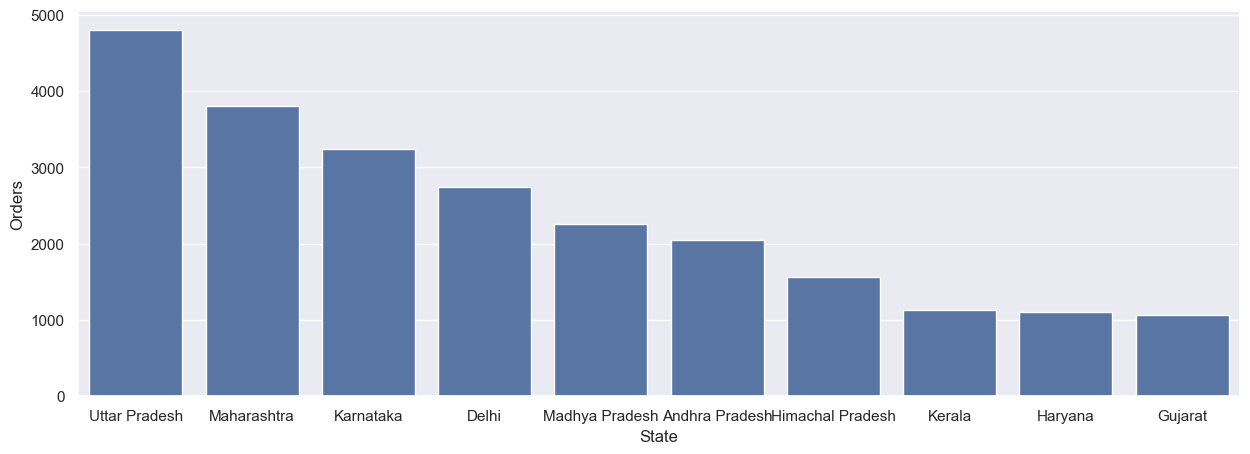

In [21]:
# total number of orders from top 10 states
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

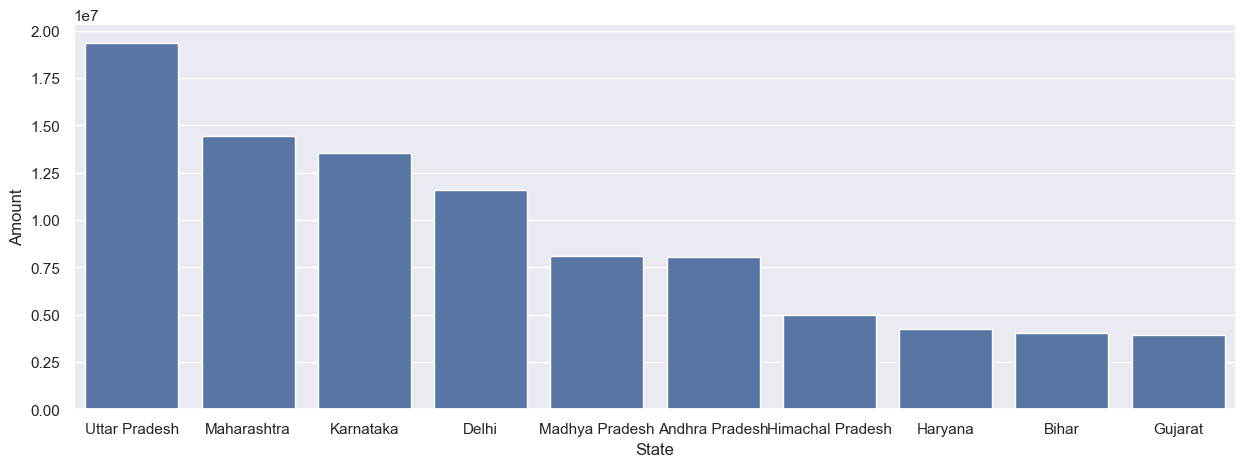

In [24]:
# total amount/sales from top 10 states
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='State',y ='Amount')



##### From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

## Marital Status

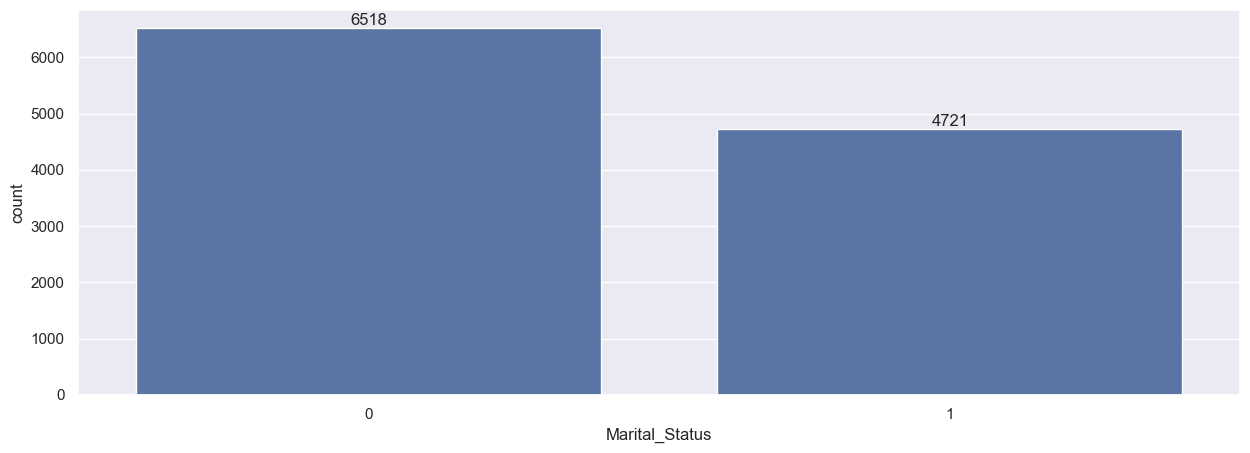

In [25]:
ax=sns.countplot(data=df,x='Marital_Status')
sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

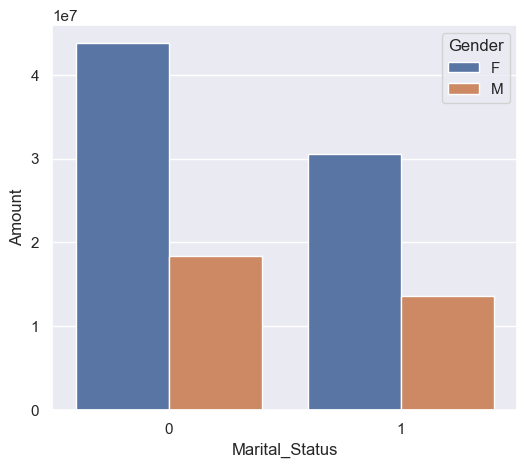

In [26]:
marital_status_sales=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=marital_status_sales,x='Marital_Status',y ='Amount',hue='Gender')

##### From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

## Occupation

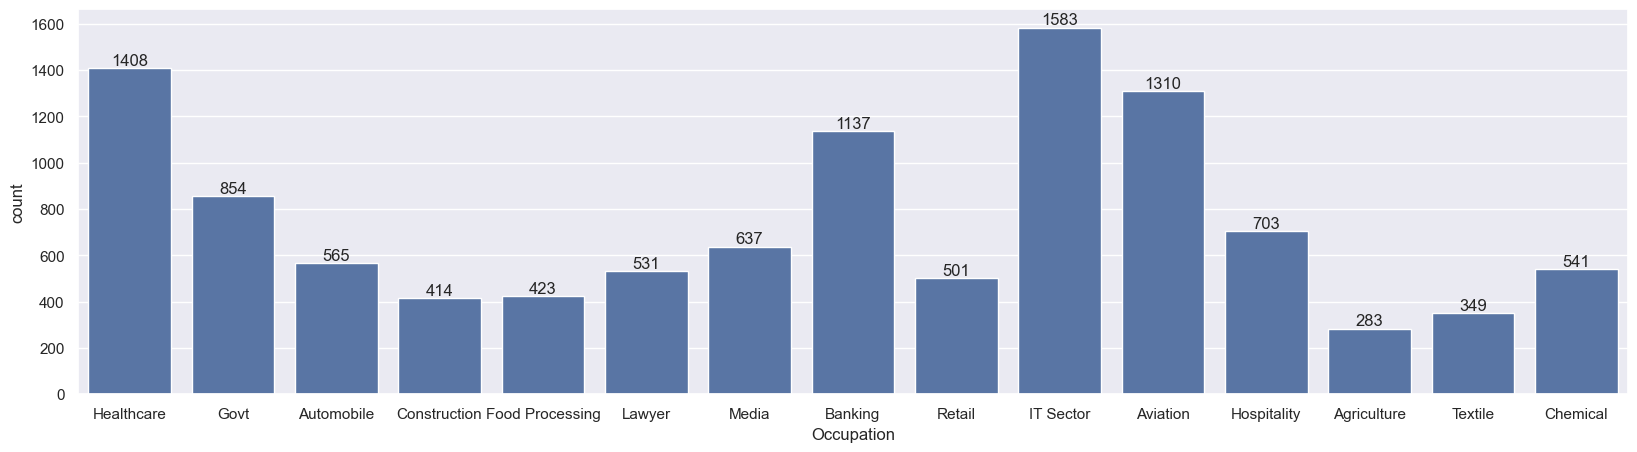

In [27]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df, x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

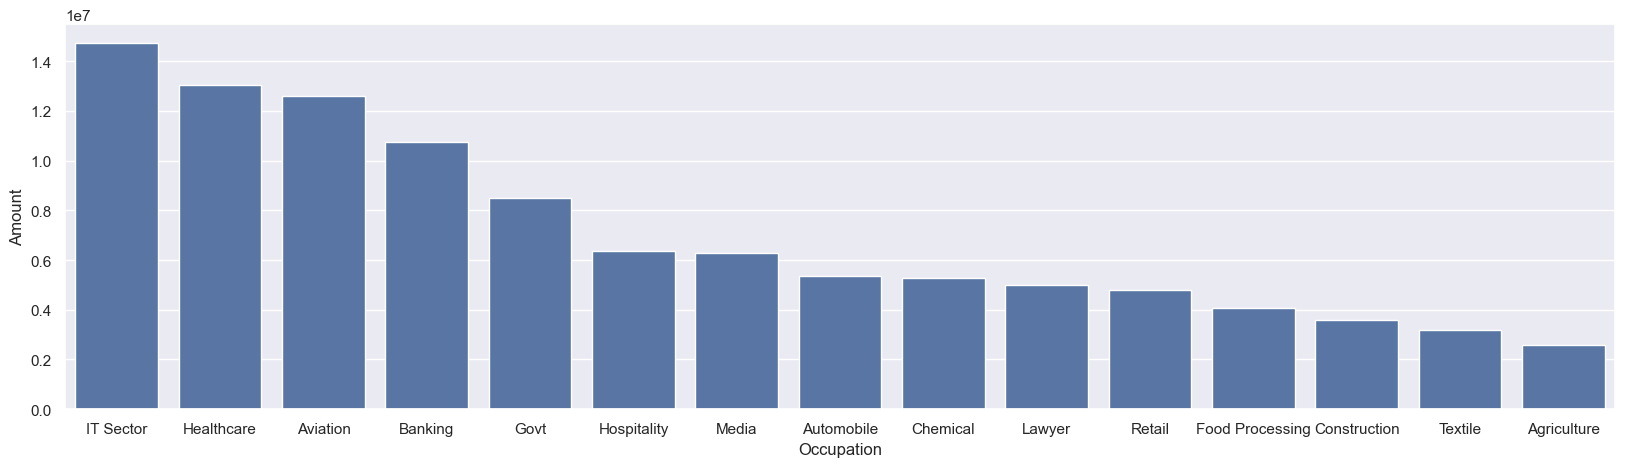

In [28]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

##### insights :
 The IT Sector dominates both in customer count and total spend, making it the most important occupation segment. Healthcare, Aviation, and Banking also show strong potential, while Agriculture, Textile, and Construction remain the least impactful in terms of both reach and revenue. Focus marketing and retention strategies on high-value occupations like IT, Healthcare, and Aviation for optimal returns.

## Product Category

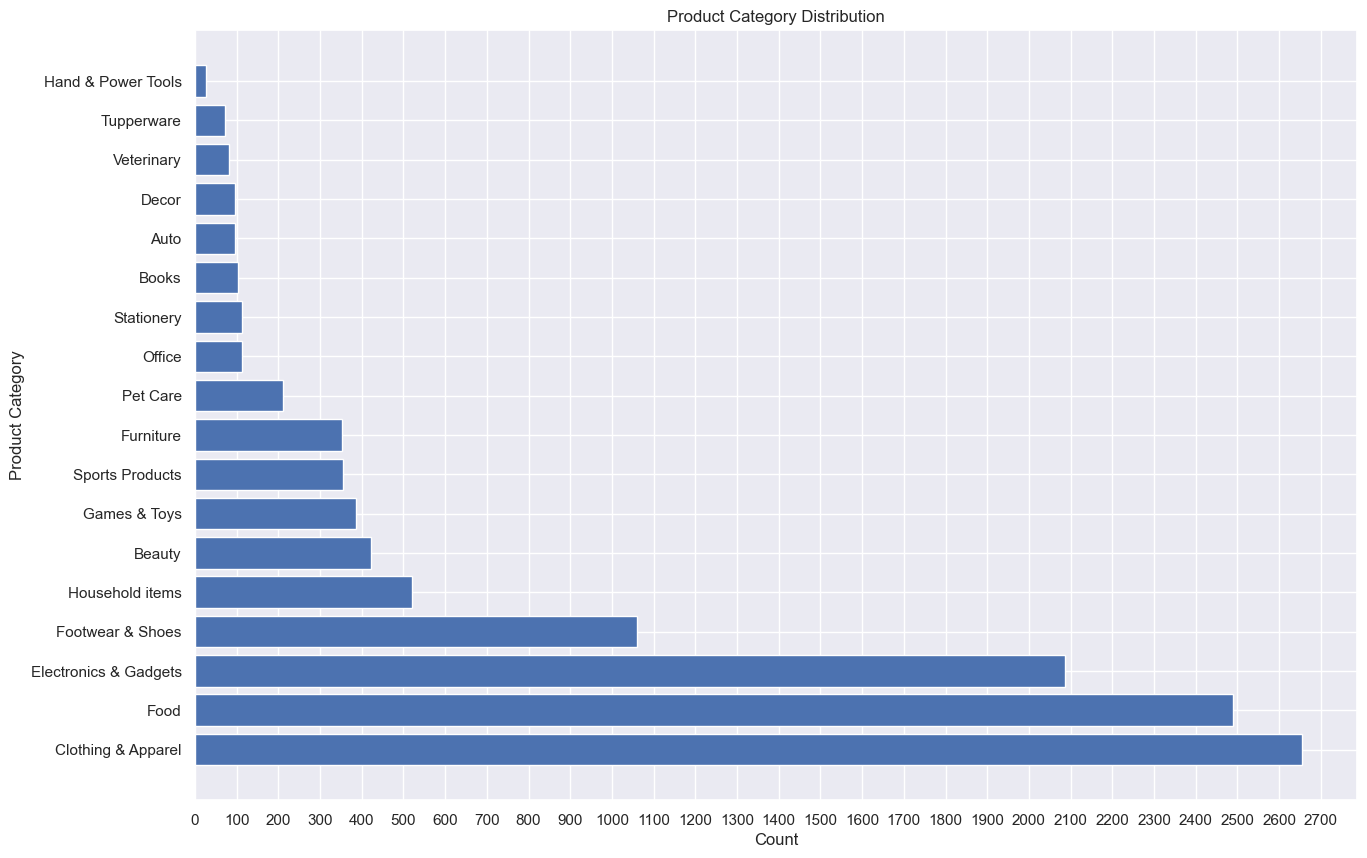

In [29]:
# Getting most popular product categories
x=df["Product_Category"].value_counts()

plt.figure(figsize=(15, 10)) # Set the figure size (width, height)
# Plot the horizontal bar chart
plt.barh(x.index,x.values)
plt.xlabel("Count")
plt.ylabel("Product Category")
plt.title("Product Category Distribution")
plt.xticks(range(0, int(x.values.max()) + 50, 100))
plt.show()


##### Insights : 
The chart highlights the most popular product categories, indicating strong user interest in the top 3–5. Less frequent categories suggest niche demand. These insights can guide inventory focus and recommendation strategies. Unusual category counts may point to data issues worth investigating.

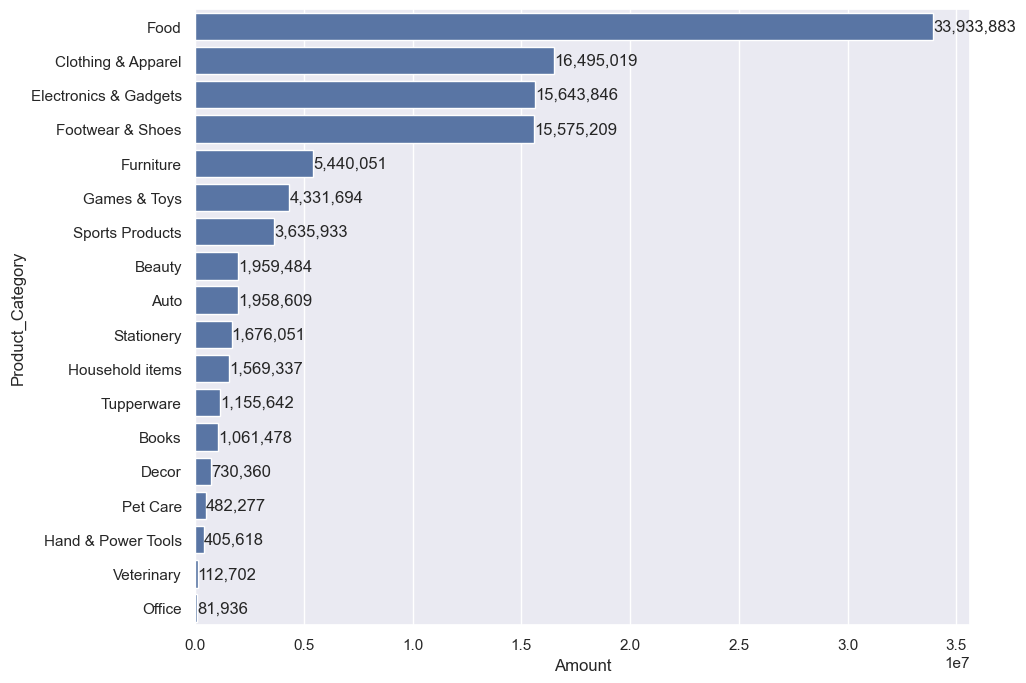

In [30]:
# Top 10 Product Category vs Amount 
categories = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize': (10, 8)})
ax = sns.barplot(data=categories, y='Product_Category', x='Amount')

# Format labels as real numbers with commas (e.g., 15,000,000)
for bar in ax.containers:
    ax.bar_label(bar, fmt='{:,.0f}')

##### Insights: 
Food leads with over 33 million in revenue, followed by Clothing, Electronics, and Footwear at 15–16 million. Mid-tier categories earn 3.6–5.4 million, while others contribute less than 2 million, showing a top-heavy revenue distribution.

<Axes: xlabel='Product_ID'>

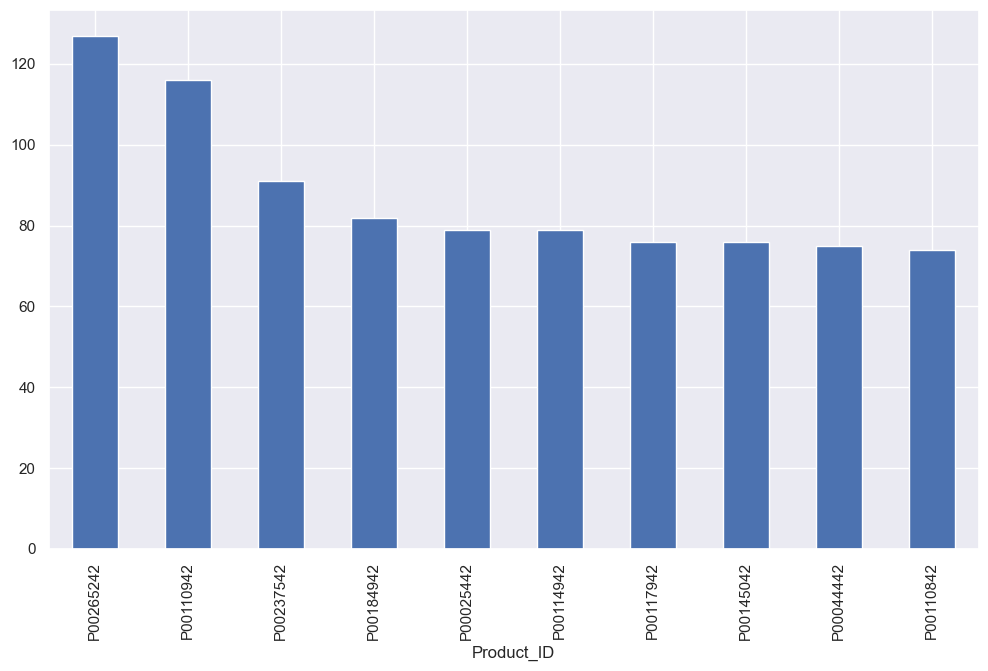

In [31]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')